# Growth rates - Brazilian states

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from matplotlib.dates import DateFormatter

## Data

### COVID-19 DATA

Data source: [Brasil.IO](https://brasil.io/dataset/covid19/caso).

Download updated data:

In [2]:
url = "https://brasil.io/dataset/covid19/caso/?format=csv"
filename = 'data/brazil_' + url.split("/")[-3] + '.csv'
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

Or load a local file until a specific date:

In [2]:
filename = 'data/brazil_covid19_06_08.csv'

In [3]:
df = pd.read_csv(filename)
df.head()

date state          city place_type  confirmed  deaths  is_last  \
0  2020-06-08    AC    Acrelândia       city        166       2     True   
1  2020-06-08    AC  Assis Brasil       city         60       4     True   
2  2020-06-08    AC     Brasiléia       city        128       5     True   
3  2020-06-08    AC        Bujari       city         77       1     True   
4  2020-06-08    AC      Capixaba       city         65       1     True   

   estimated_population_2019  city_ibge_code  confirmed_per_100k_inhabitants  \
0                    15256.0       1200013.0                      1088.09649   
1                     7417.0       1200054.0                       808.95241   
2                    26278.0       1200104.0                       487.09947   
3                    10266.0       1200138.0                       750.04870   
4                    11733.0       1200179.0                       553.99301   

   death_rate  
0      0.0120  
1      0.0667  
2      0.0391  
3      0.0130  
4      0.0154

In [4]:
df2 = df[ df['place_type'] == 'state']
#df3 = df2.dropna()
df2['city_ibge_code'] = df2['city_ibge_code'].astype(int)
df3 = df2.drop(columns= ['city'])

Growh rate raw calculation:

In [5]:
def delta(df_conf):

    list_ = []
    list_.append(0)

    for j in range(len(df_conf) - 1):

        list_.append(df_conf[j+1] - df_conf[j])

    return list_

Select a list of states:

In [6]:
# All
states_ = df3['state'].unique()

# Specify
#states_ = np.array(['SP', 'RJ'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
AC


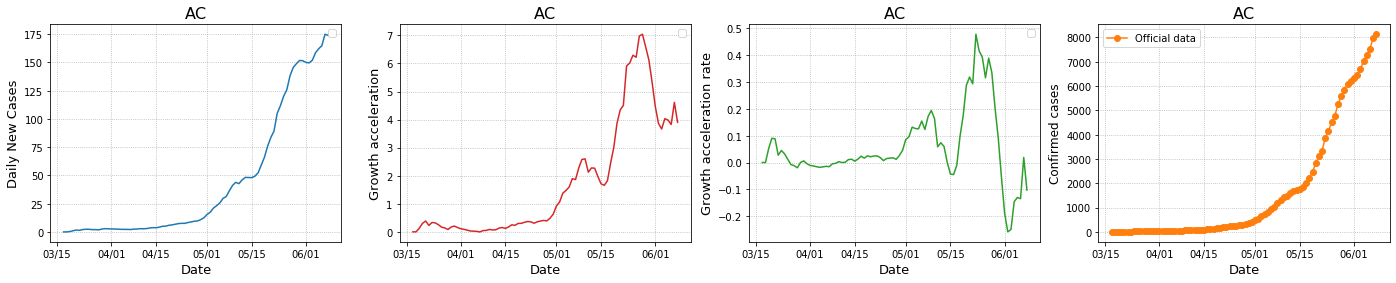

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
AL


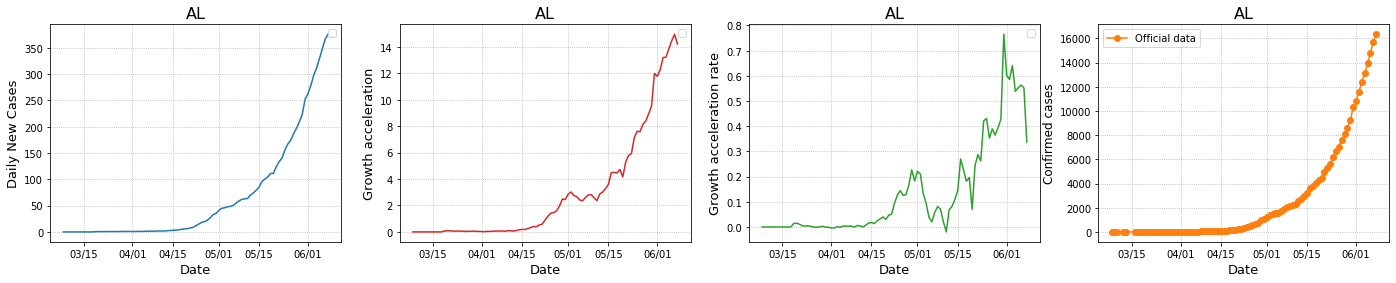

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
AP


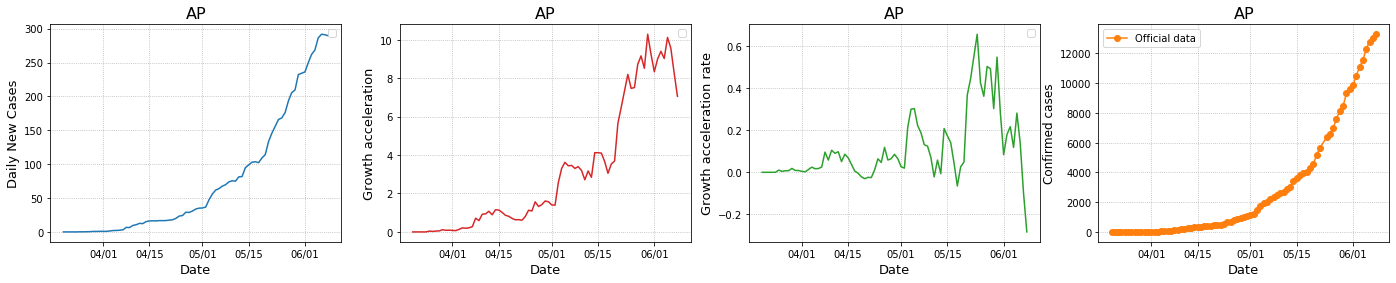

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
BA


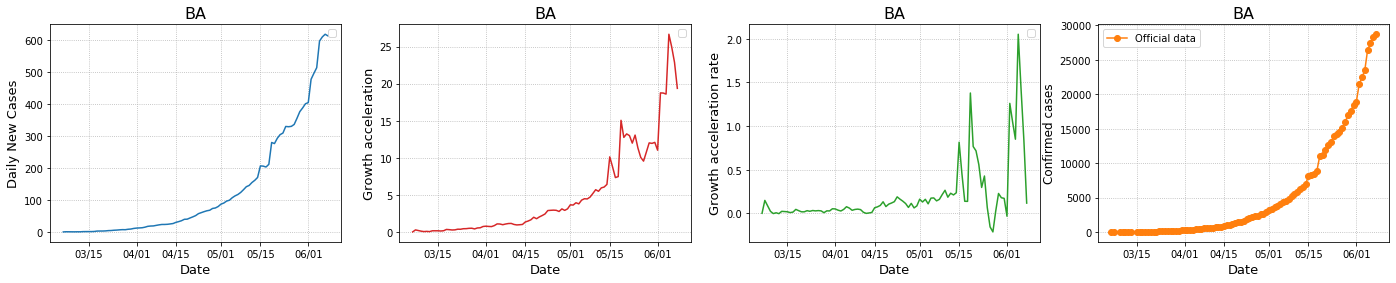

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
CE


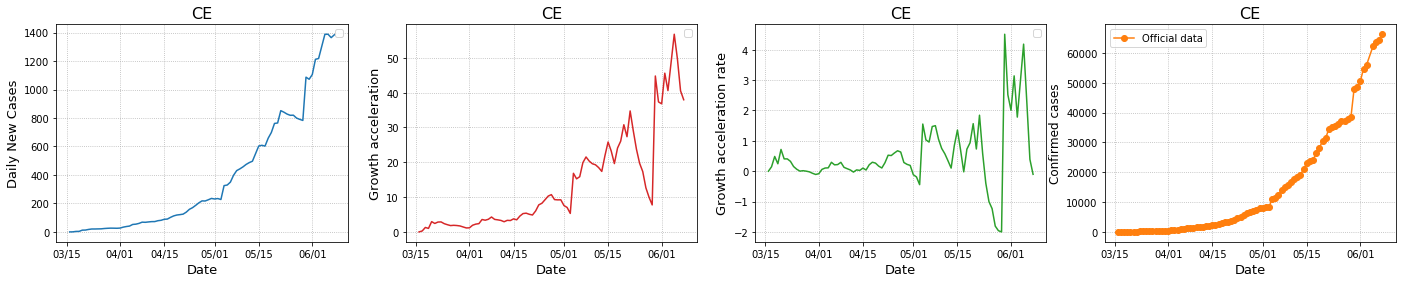

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
DF


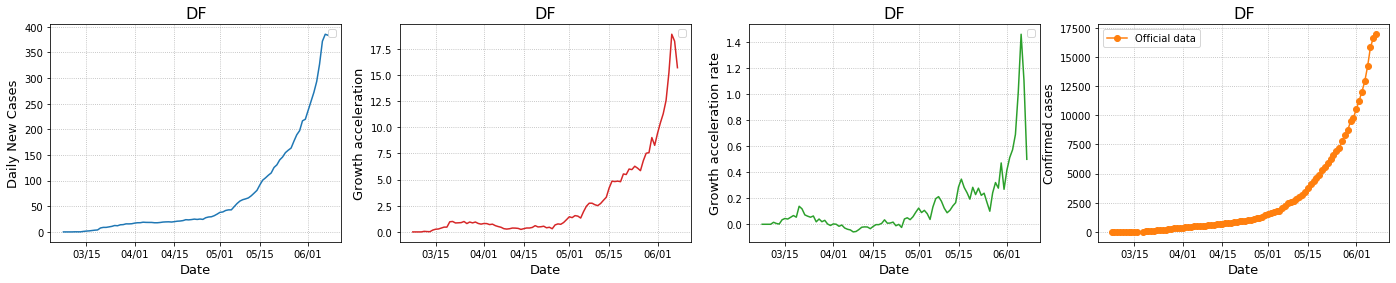

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
ES


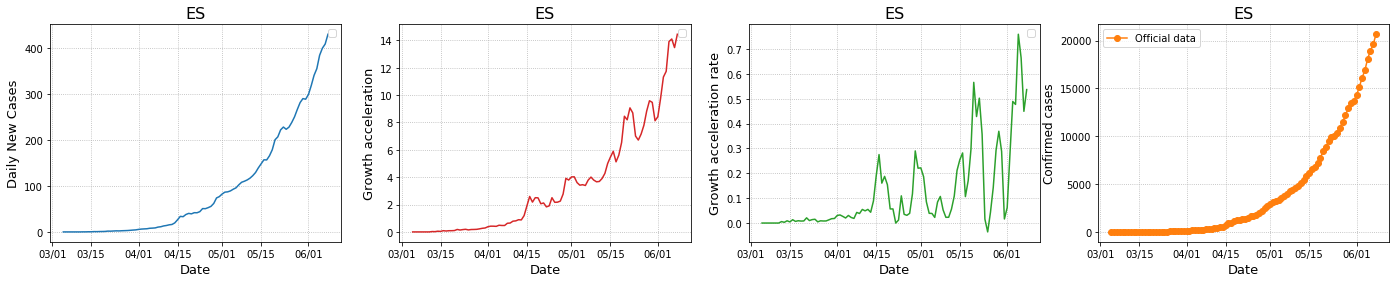

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
GO


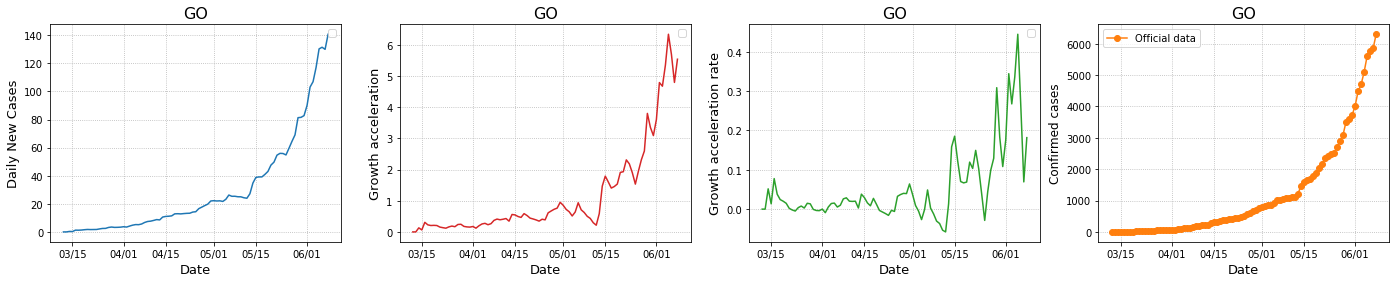

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
MA


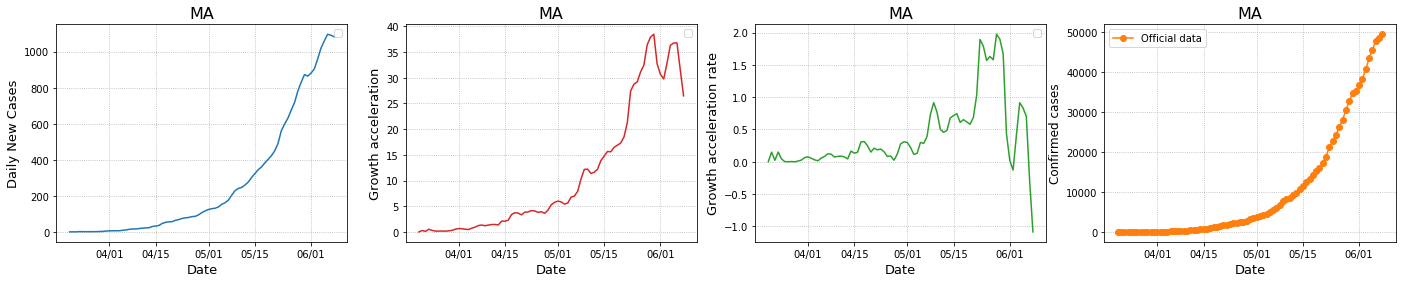

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
MG


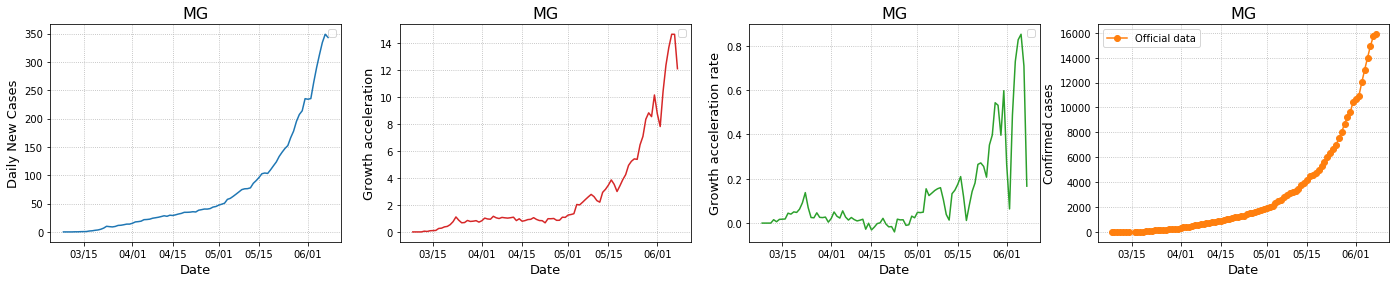

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
MT


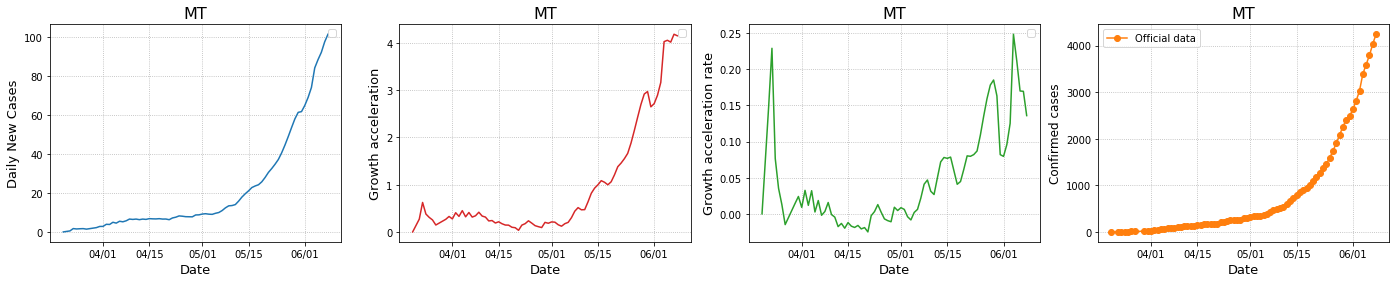

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
PA


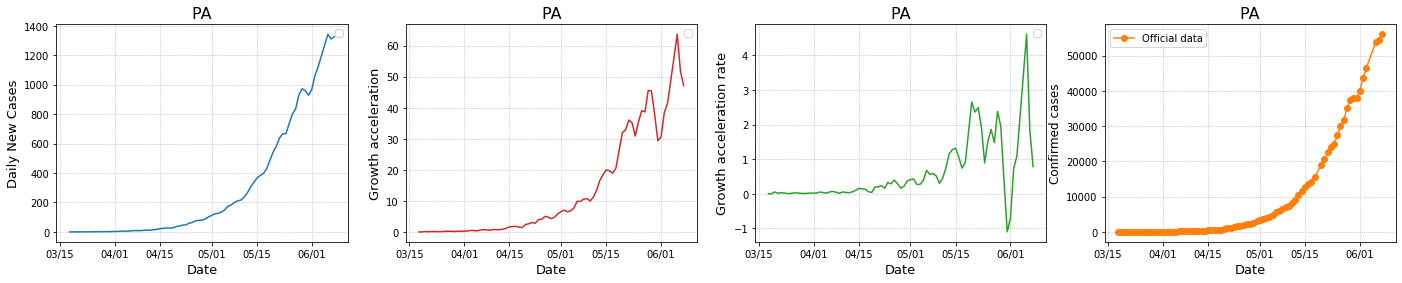

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
PB


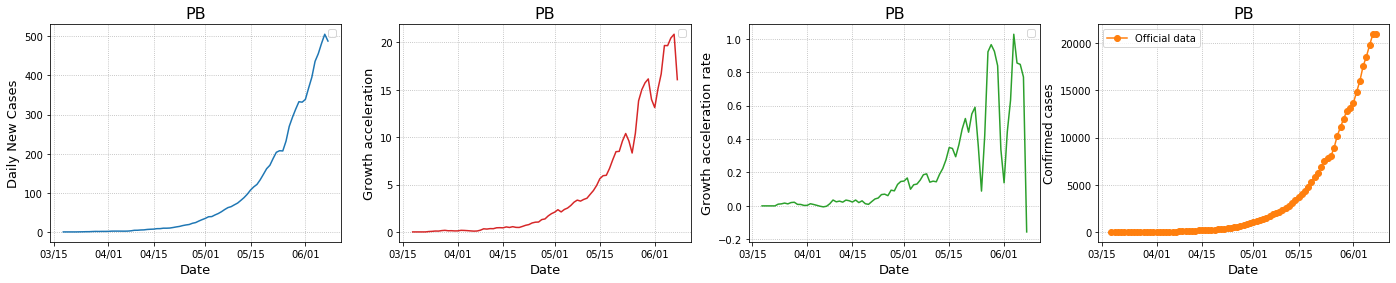

PI
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


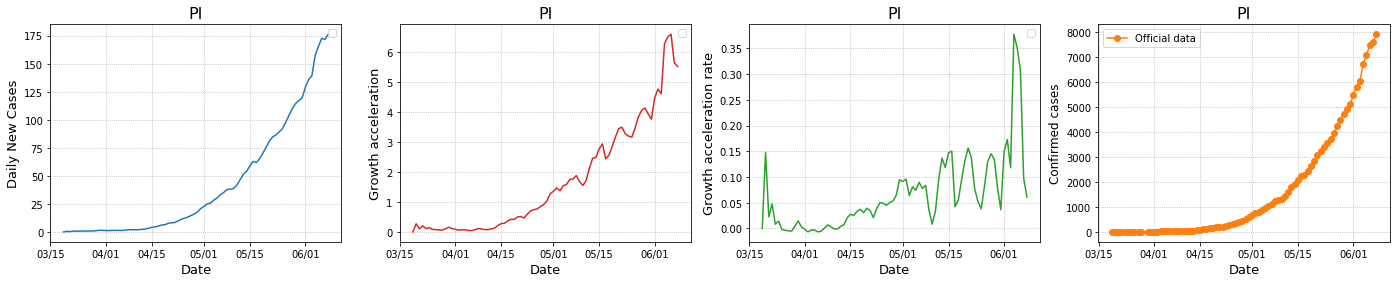

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
PR


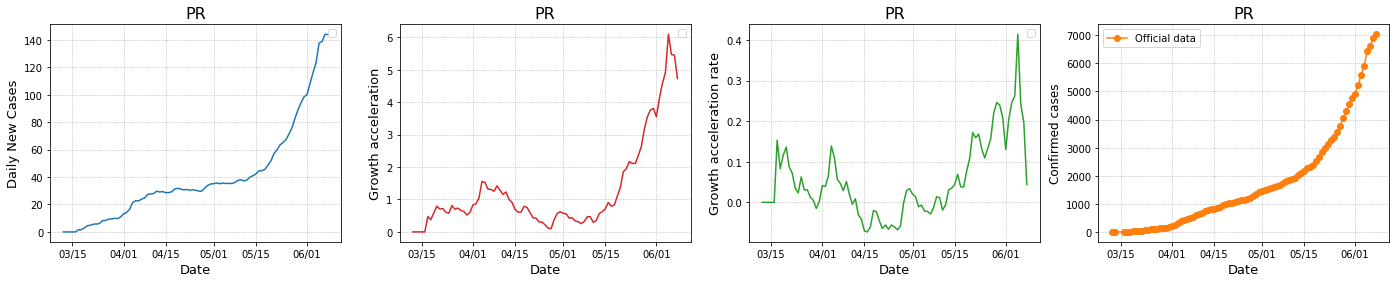

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
RJ


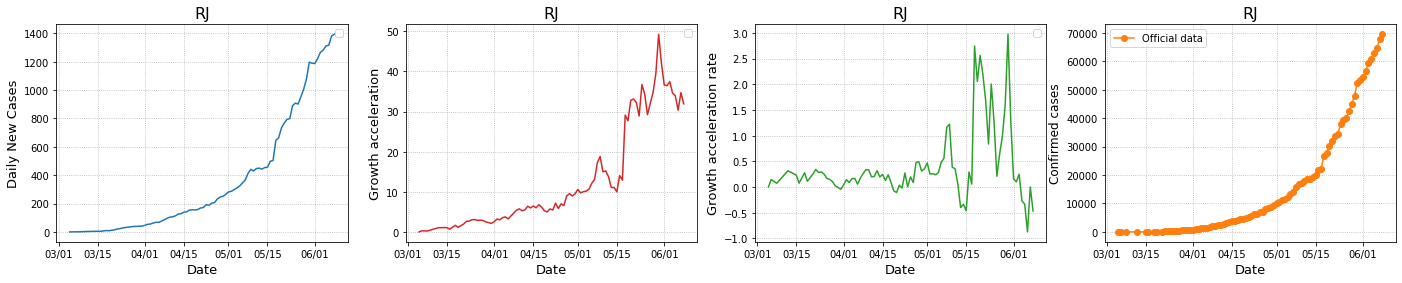

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
RO


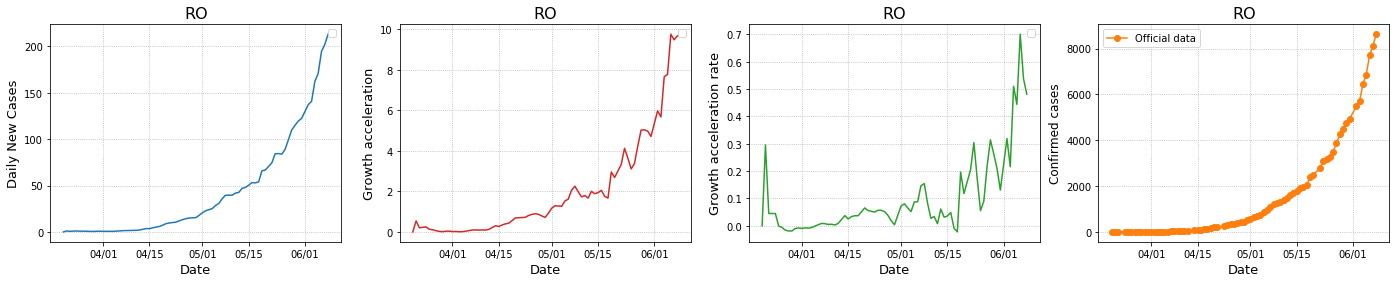

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
RS


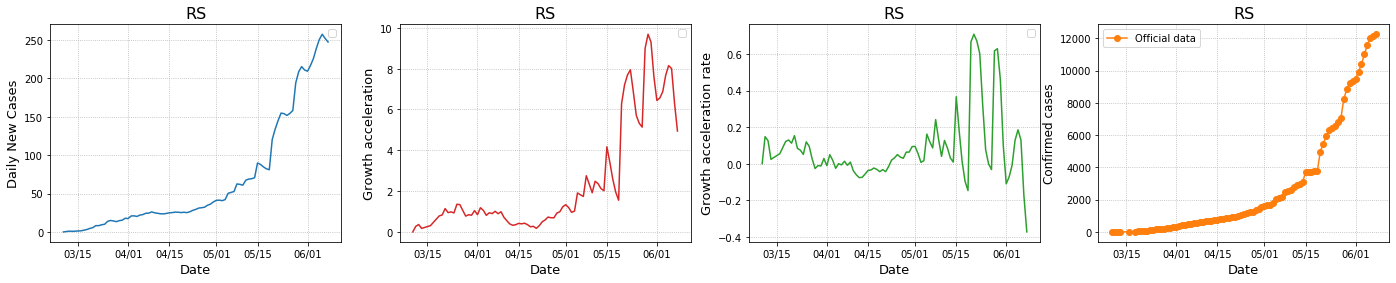

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
SC


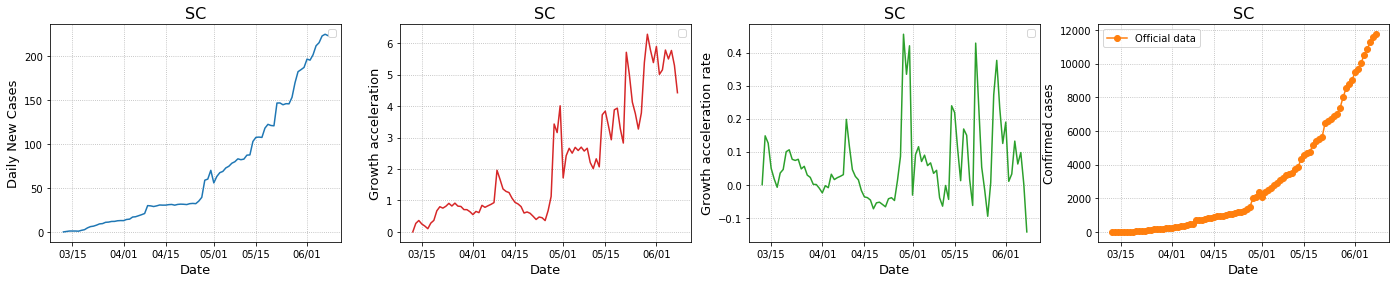

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
SP


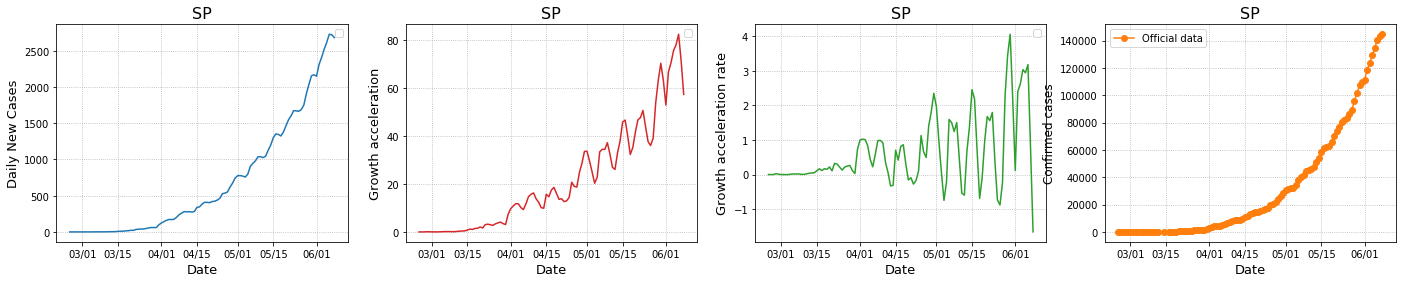

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
TO


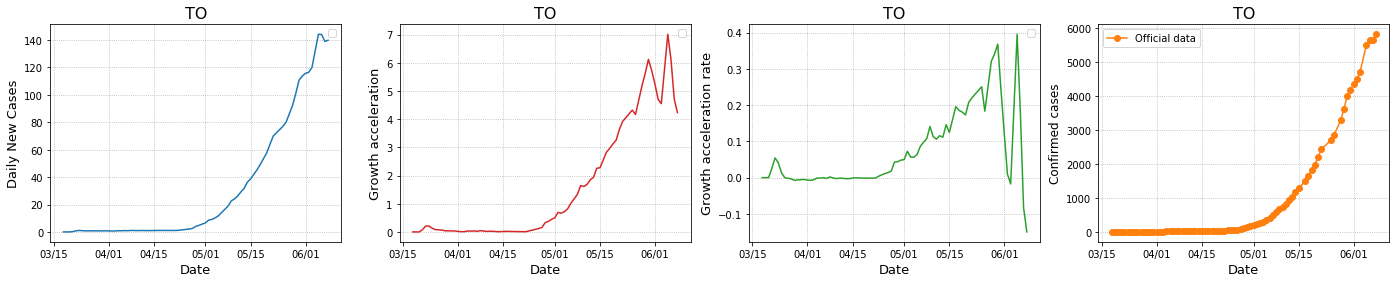

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
AM


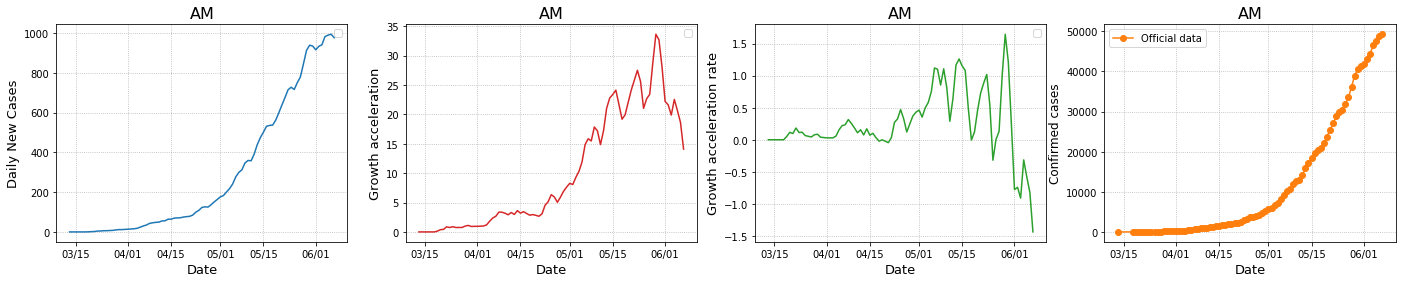

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
MS


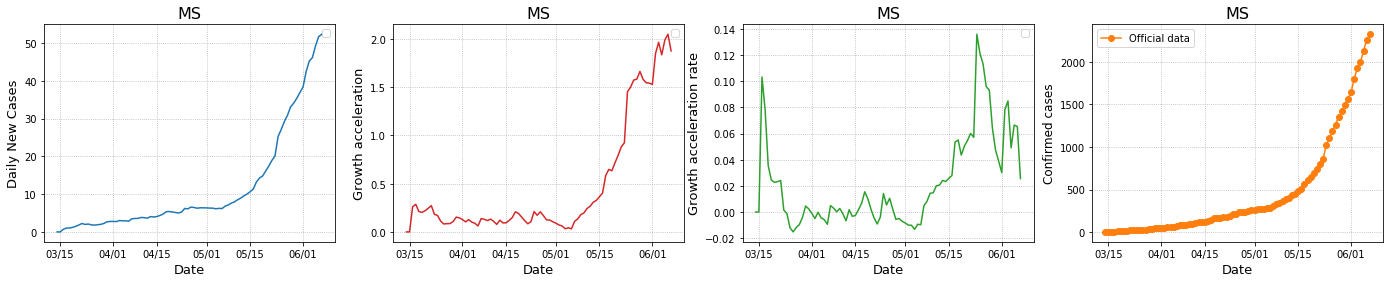

No handles with labels found to put in legend.
PE
No handles with labels found to put in legend.
No handles with labels found to put in legend.


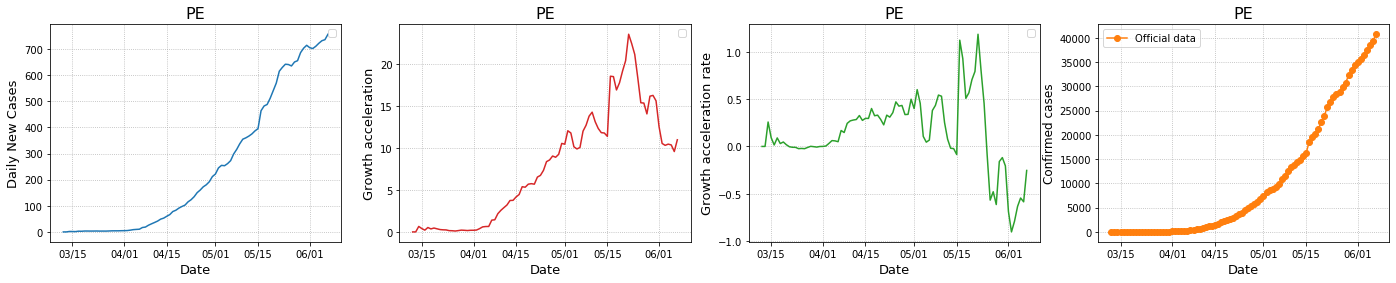

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
RR


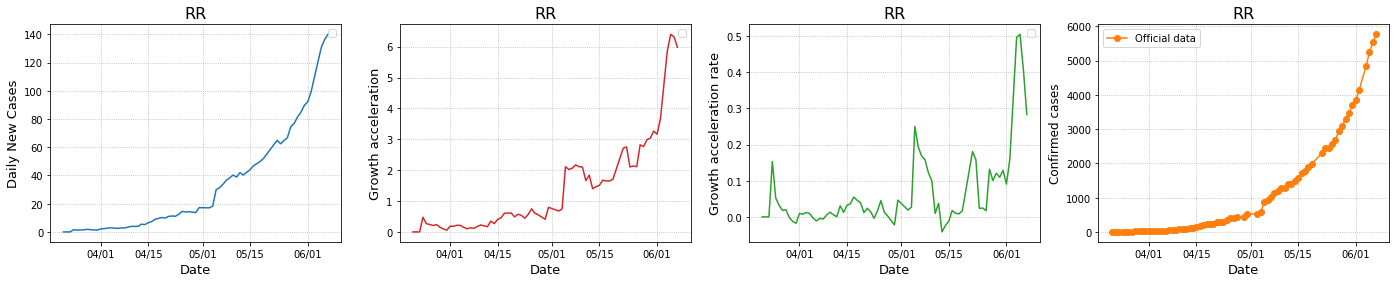

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
SE


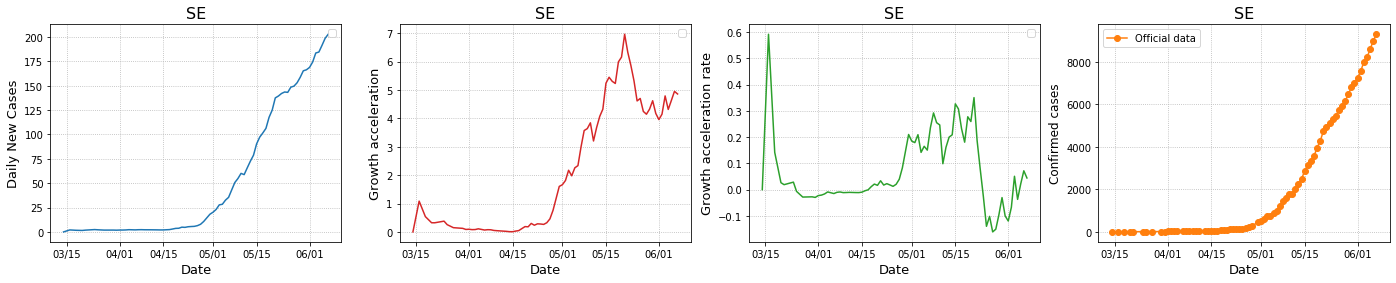

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
RN


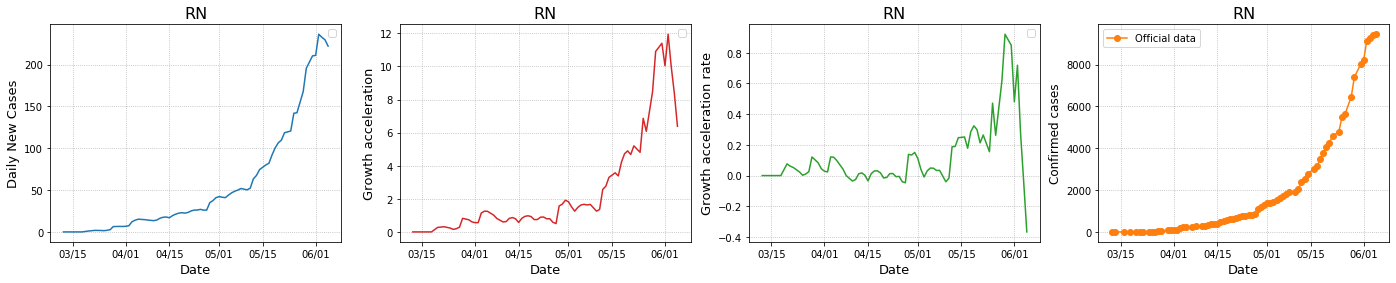

In [11]:
results_ = []

### EWM
alpha = 30.
alpha2 = 7.
alpha3 = 5.

### Classification threshold
# Cases
CASES_threshold = 50
# Normalized growth rate (%)
GROWTH_RATE_threshold = 1
# Normalized growth acceleration (%)
GROWTH_ACCEL_threshold = 0.01

### Last date into results_ list?
last = True
### If not, what date? (Do no forget to set last = False)
#### CAREFUL: a location might not have data for this particular day (some places do not have records on sundays, for instance)
#until_date = '2020-05-02'

for states in states_:

    print(states)

    df_ = df3[ df3['state'] == states].sort_values(by='date').set_index('date')
    df_ =  df_ [ df_['confirmed']  > 0]
    df_.index = pd.to_datetime(df_.index)

    # Rate
    df_['growth_rate_'] = delta(df_['confirmed'])

    # Exponential weight
    df_['growth_rate'] = df_['growth_rate_'].ewm(com= alpha).mean()

    # Rate
    df_['growth_accel_'] = delta(df_['growth_rate'])

    # Exponential weight
    df_['growth_accel'] = df_['growth_accel_'].ewm(com= alpha2).mean()

    # Rate
    df_['growth_accel_rate_'] = delta(df_['growth_accel'])

    # Exponential weight
    df_['growth_accel_rate'] = df_['growth_accel_rate_'].ewm(com= alpha3).mean()

    # Dropping unsmoothed quantities
    df_ = df_.drop('growth_rate_', axis=1)
    df_ = df_.drop('growth_accel_', axis=1)
    df_ = df_.drop('growth_accel_rate_', axis=1)

    # Normalized quantities
    df_['growth_rate_NORM_(%)'] = 100*df_['growth_rate'] / df_['confirmed']
    df_['growth_accel_NORM_(%)'] = 100*df_['growth_accel'] / df_['confirmed']
    df_['growth_accel_rate_NORM_(%)'] = 100*df_['growth_accel_rate'] / df_['confirmed']

    # Classification

    df_['LENTO'] =  (df_['confirmed'] < CASES_threshold)*1

    df_['EXPONENCIAL'] = ( df_['growth_accel_NORM_(%)']  >= GROWTH_ACCEL_threshold )*1

    df_['DESACELERACAO'] = ( df_['growth_accel_NORM_(%)']  <= -GROWTH_ACCEL_threshold )*1

    df_['ESTAVEL'] = ( (df_['growth_rate_NORM_(%)']  <  GROWTH_RATE_threshold) &  (df_['growth_accel_NORM_(%)']  > - GROWTH_ACCEL_threshold) & (df_['growth_accel_NORM_(%)']  <         GROWTH_ACCEL_threshold) )*1

    df_['LINEAR'] = ( (df_['growth_rate_NORM_(%)']  >=  GROWTH_RATE_threshold ) &  (df_['growth_accel_NORM_(%)']  > - GROWTH_ACCEL_threshold) & (df_['growth_accel_NORM_(%)']  < GROWTH_ACCEL_threshold) )*1


    df_.loc[df_['LENTO'] == True, 'CLASSIFICACAO'] = 'LENTO'
    df_.loc[ (df_['LENTO'] != True) & (df_['DESACELERACAO'] == True), 'CLASSIFICACAO'] = 'DESACELERACAO'
    df_.loc[ (df_['LENTO'] != True) & (df_['ESTAVEL'] == True), 'CLASSIFICACAO'] = 'ESTAVEL'
    df_.loc[ (df_['LENTO'] != True) & (df_['LINEAR'] == True), 'CLASSIFICACAO' ] = 'LINEAR'
    df_.loc[ (df_['LENTO'] != True) & (df_['EXPONENCIAL'] == True), 'CLASSIFICACAO' ] = 'EXPONENCIAL'

    # Plot
    fig, axes = plt.subplots(1, 4, figsize= (24, 4))
    
        
    axes[0].plot(df_['growth_rate'])
    axes[0].set_title(states, fontsize= 16)
    axes[0].set_ylabel('Daily New Cases', fontsize= 13)
    axes[0].set_xlabel('Date', fontsize= 13)
    axes[0].grid(linestyle=':')
    axes[0].legend()

    axes[1].plot(df_['growth_accel'], color= 'C3')
    axes[1].set_title(states, fontsize= 16)
    axes[1].set_ylabel('Growth acceleration', fontsize= 13)
    axes[1].set_xlabel('Date', fontsize= 13)
    axes[1].grid(linestyle=':')
    axes[1].legend()

    axes[2].plot(df_['growth_accel_rate'], color= 'C2')
    axes[2].set_title(states, fontsize= 16)
    axes[2].set_ylabel('Growth acceleration rate', fontsize= 13)
    axes[2].set_xlabel('Date', fontsize= 13)
    axes[2].grid(linestyle=':')
    axes[2].legend()

    axes[3].plot(df_[['confirmed']], 'o-', color= 'C1', label= 'Official data')
    axes[3].set_ylabel('Confirmed cases', fontsize= 12)
    axes[3].set_title(states, fontsize= 16)
    axes[3].set_xlabel('Date', fontsize= 13)
    axes[3].grid(linestyle=':')
    axes[3].legend()


    date_form = DateFormatter("%m/%d")
    axes[0].xaxis.set_major_formatter(date_form)
    axes[1].xaxis.set_major_formatter(date_form)
    axes[2].xaxis.set_major_formatter(date_form)
    axes[3].xaxis.set_major_formatter(date_form)

    df_ = df_.reset_index()

    if last:
        results_.append(df_.iloc[-1].to_dict())
    else:
        idx_ = df_.index[df_['date'] == until_date]
        if len(idx_) > 0:
            results_.append(df_.iloc[idx_[0]].to_dict())
        else:
            print('%s data NOT available for %s' % (until_date, states))

    #plt.savefig('file_name.png', bbox_inches='tight')
    plt.show()


results = pd.DataFrame(results_)

#results.to_csv('results/dfs/growth_states_BR_class_.csv', index= True, sep= ';')